In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [105]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
print('---------------- Statistical information about data  --------------')
print(df.describe())

print('---------------- Number of data samples and features --------------')
print(df.shape)

print('---------------- Information about dataset --------------')
print(df.info())

print('---------------- Features --------------')
print(df.columns)


---------------- Statistical information about data  --------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
-------------

So, the number of rows is 891 and number of features is 12. There are some categorical (Name,Sex, Ticket,Cabin, Embarked) and numerical (PassengerId,survived,Pclass,Age,SibSp,Parch,Fare) features in dataset. Firstly, it is important to clean row data and extract a dataframe that is suitable for using as a model input. 

# Exploratory Data Analysis

In [107]:
grouped = df.groupby('Sex')
survived_sex = grouped['Survived'].sum()
survived_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Percentage of Female and Men Survived')

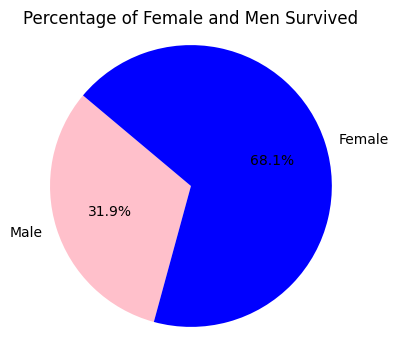

In [108]:
import matplotlib.pyplot as plt

labels = ['Male', 'Female']
sizes = [survived_sex['male']/sum(survived_sex),survived_sex['female']/sum(survived_sex)] 
colors = ['pink', 'blue']  # Colors for each section

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Title
plt.title('Percentage of Female and Men Survived')

In [109]:
grouped = df.groupby('Pclass')
survived_pclass = grouped['Survived'].sum()
survived_pclass

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Percentage of Survived in Different Classes')

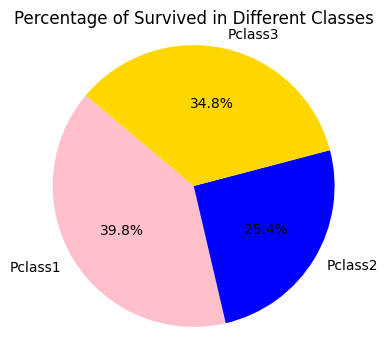

In [110]:
import matplotlib.pyplot as plt

labels = ['Pclass1', 'Pclass2', 'Pclass3']
sizes = [survived_pclass[1]/sum(survived_pclass),survived_pclass[2]/sum(survived_pclass),survived_pclass[3]/sum(survived_pclass) ] 
colors = ['pink', 'blue','gold']  # Colors for each section

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Title
plt.title('Percentage of Survived in Different Classes')

In [111]:
grouped = df.groupby('Survived')
survived_age = grouped['Age'].mean()
survived_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [112]:
grouped = df.groupby('Survived')
survived_Fare = grouped['Fare'].mean()
survived_Fare

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Percentage of Survived with Low and High Fare')

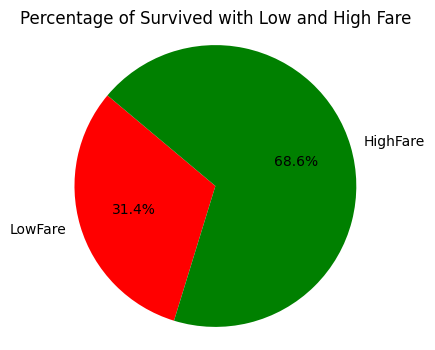

In [113]:
import matplotlib.pyplot as plt

labels = ['LowFare', 'HighFare']
sizes = [survived_Fare[0]/sum(survived_Fare),survived_Fare[1]/sum(survived_Fare)] 
colors = ['red', 'green']  # Colors for each section

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Title
plt.title('Percentage of Survived with Low and High Fare')

# Data Preprocessing

#### Drop some unimportant features from dataframe (features dont have positive effect on trainig model)

In [115]:
df = df.drop(['PassengerId','Name','Ticket', 'Cabin','Embarked'], axis=1)


In [116]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [117]:
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'female' else 1)


There is one missed value in Age columns. It is used interpolation for filling that missed value.

In [118]:
df['Age'] = df['Age'].interpolate()

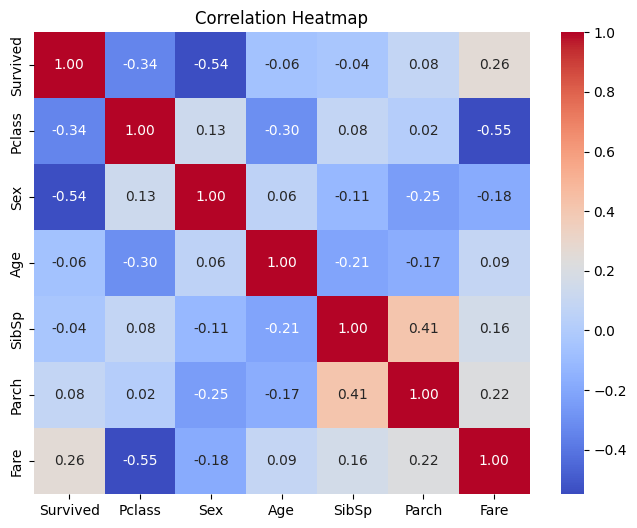

In [119]:
import seaborn as sns

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Optional: for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model Defining

In [120]:
y = df['Survived']
X = df.drop(['Survived','Fare'], axis=1)

In [121]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0


Target Value contains zero and one value. So, Logistic Regression is one of good options for classifying data.

In [126]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy Score: 0.8097014925373134

Confusion Matrix:
 [[137  20]
 [ 31  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# Predicting from test input data

In [127]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
df_test = df_test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
df_test['Sex'] = df_test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
df_test['Age'] = df_test['Age'].interpolate()
X_test = df_test.drop(['PassengerId','Fare'], axis=1)

In [129]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
df_result = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':list(y_pred)})
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [133]:
df_result.to_csv('gender_submission_logistic_regression.csv', index=False)
print('gender submission successfilly is finished')

gender submission successfilly is finished


# Using Neural Network in Tensorflow

In [134]:
y = df['Survived']
X = df.drop(['Survived','Fare'], axis=1)

In [135]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Sample data
# Replace this with your actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model with regularization
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation=tf.keras.layers.LeakyReLU(alpha=0.01), 
                kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate

# Hidden layer with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate

# Hidden layer with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)


c:\Users\Gymnasiet\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\Gymnasiet\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5176 - loss: 1.5642 - val_accuracy: 0.7440 - val_loss: 1.4291
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6119 - loss: 1.4424 - val_accuracy: 0.8000 - val_loss: 1.3370
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6732 - loss: 1.3573 - val_accuracy: 0.8240 - val_loss: 1.2503
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6455 - loss: 1.3268 - val_accuracy: 0.8000 - val_loss: 1.1781
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7555 - loss: 1.2100 - val_accuracy: 0.8080 - val_loss: 1.1039
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6905 - loss: 1.2030 - val_accuracy: 0.8080 - val_loss: 1.0446
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 1.1078 - val_accuracy: 0.8160 - val_loss: 0.9889
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7112 - loss: 1.0952 - val_accuracy: 0.8000 - val_loss

In [137]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
df_test['Sex'] = df_test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
df_test['Age'] = df_test['Age'].interpolate()
X_test = df_test.drop(['PassengerId','Fare'], axis=1)
X_test_scaled = scaler.transform(X_test)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred = y_pred.flatten()

df_result = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':y_pred})
df_result.to_csv('gender_submission_NN.csv', index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [138]:
df_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
